In [56]:
# Ben McChesney
# 3/14/2019

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# data straight from CSV export isn't usable in a dataframe
# need to do some string manopulation to remove excess headers / footers that are packaged with export
# needs to work reusable for pages + audience formats    
def load_csv_remove_GA_excess(path):
    with open(path) as file:
        file_string = file.read()

        # remove header data
        header_end_char_index = file_string.rfind("Day Index")
        file__string_no_header = file_string[header_end_char_index:]

        # remove footer data
        # go back to the 2nd to last comma
        footer_begin_char_index = file__string_no_header.rfind(",",0,file__string_no_header.rfind(","))
        data_no_footer = file__string_no_header[:footer_begin_char_index]
        df = pd.read_csv( pd.compat.StringIO(data_no_footer) )
        
        # convert column to datetime to make it useful
        df["Day Index"] = pd.to_datetime(df["Day Index"])
        return df

In [58]:
audience_path = "Analytics 1 Master View Audience Overview 20190101-20190131.csv"
audience_df = load_csv_remove_GA_excess(audience_path)
#audience_df.plot(x="Day Index", y="Users")

In [59]:
pages_file_path = "Analytics 1 Master View Pages 20190101-20190131.csv"
pages_df = load_csv_remove_GA_excess(pages_file_path)
#pages_df.plot(x="Day Index", y="Pageviews")


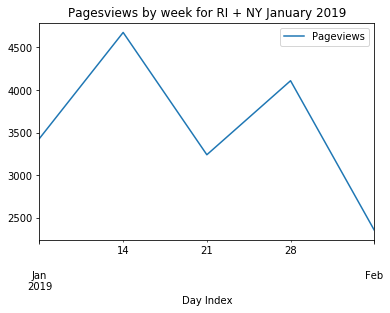

In [60]:
# resample dataframe and aggregate to weekly sums
pages_weekly_df = pages_df.resample("W-Mon",on="Day Index").sum().reset_index().sort_values(by="Day Index")
pages_weekly_df.plot(x="Day Index", y="Pageviews", title="Pagesviews by week for RI + NY January 2019")

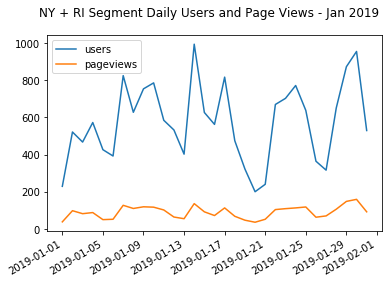

In [61]:
# need to establish plot here for some more advanced formatting
fig = plt.figure()

plt.plot(pages_df["Day Index"], pages_df["Pageviews"])
plt.plot(audience_df["Day Index"], audience_df["Users"])
plt.legend(['users','pageviews'])
fig.suptitle('NY + RI Segment Daily Users and Page Views - Jan 2019')
# make the dates readable
fig.autofmt_xdate()